### ****Loan Default Prediction for a Digital Lending Fintech**** 

#### Objective  
Your task is to analyze historical loan data and build a model that predicts whether a borrower will default on their loan.  

This is a critical problem in digital lending as it helps:  
- Optimize credit decisions  
- Minimize risk  

#### ****Importing Necessary Libraries****

In [1]:
# import all necessary libraries
import numpy as np
import pandas as pd

# for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# ggplot style sheet
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'c:\\Users\\Blessing\\OneDrive\\Documents\\Andy\\OxygenX'

In [3]:
# importing data
df1 = pd.read_csv('loan_data.csv')
df1.head()

,loan_id,customer_id,age,gender,income,loan_amount,tenure_months,credit_score,employment_status,bank_balance,number_of_loans,missed_payments,defaulted
0,1,4174,62,Female,237598.0,53527,12,829.0,Full-time,711058,1,2,0
1,2,4507,22,Female,191521.0,234490,36,626.0,Unemployed,606603,1,2,0
2,3,1860,50,Male,100290.0,149883,6,396.0,Full-time,29086,1,4,1
3,4,2294,18,Male,438832.0,103344,6,812.0,Self-employed,934826,3,2,0
4,5,2130,35,Male,398805.0,165344,6,515.0,Part-time,125604,0,8,0


In [4]:
# data shape
df1.shape

(1020, 13)

In [5]:
# data info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            1020 non-null   int64  
 1   customer_id        1020 non-null   int64  
 2   age                1020 non-null   int64  
 3   gender             1020 non-null   object 
 4   income             968 non-null    float64
 5   loan_amount        1020 non-null   int64  
 6   tenure_months      1020 non-null   int64  
 7   credit_score       990 non-null    float64
 8   employment_status  1020 non-null   object 
 9   bank_balance       1020 non-null   int64  
 10  number_of_loans    1020 non-null   int64  
 11  missed_payments    1020 non-null   int64  
 12  defaulted          1020 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 103.7+ KB


In [6]:
# checking for missing values
df1.isnull().sum()

loan_id               0
customer_id           0
age                   0
gender                0
income               52
loan_amount           0
tenure_months         0
credit_score         30
employment_status     0
bank_balance          0
number_of_loans       0
missed_payments       0
defaulted             0
dtype: int64

In [7]:
# handling missing values(income and credit_score) with median
df1['income'].fillna(float(df1['income'].median()), inplace=True)
df1['credit_score'].fillna(float(df1['credit_score'].median()), inplace=True)

In [8]:
# verifying that missing values were handled correctly
df1.isnull().sum()

loan_id              0
customer_id          0
age                  0
gender               0
income               0
loan_amount          0
tenure_months        0
credit_score         0
employment_status    0
bank_balance         0
number_of_loans      0
missed_payments      0
defaulted            0
dtype: int64

In [9]:
# checking for duplicates
df1.duplicated().sum()

np.int64(20)

In [10]:
# viewing the duplicate rows
print(df1[df1.duplicated()])

      loan_id  customer_id  age   gender    income  loan_amount  \
1000      606         2369   34     Male  406898.0        55913   
1001      341         1146   50   Female  118803.0        92289   
1002      139         3568   62     Male  443409.0       178616   
1003       37         1747   31  Unknown  467480.0       226204   
1004      469         3205   44   Female  280255.0       119814   
1005      926         3811   44   Female  288083.0       131757   
1006      513         3537   31   Female  391207.0       130076   
1007       95         3613   41   Female  408142.0       167608   
1008      772         3326   62   Female  417570.0       213561   
1009      419         1397   35     Male  485477.0        23261   
1010      188         1870   61   Female  186554.0        87603   
1011      474         3146   61   Female  289779.0       185121   
1012      210         3796   59   Female  280255.0       194384   
1013      622         2119   51   Female  205394.0       29398

In [11]:
# Remove duplicate rows
df1.drop_duplicates(inplace=True)

In [12]:
# Verify that duplicates are removed
print(df1.duplicated().sum())

0


#### ****Descriptive Analysis****

In [13]:
# descriptive analysis
df1.describe().T.astype(int)

,count,mean,std,min,25%,50%,75%,max
loan_id,1000,500,288,1,250,500,750,1000
customer_id,1000,3032,1138,1001,2064,2981,4050,4993
age,1000,41,13,18,29,42,53,64
income,1000,275400,123519,50138,178266,280255,378419,499763
loan_amount,1000,162164,84456,10192,91963,164197,236335,299730
tenure_months,1000,18,10,6,12,12,24,36
credit_score,1000,570,155,300,438,559,708,849
bank_balance,1000,512849,286852,294,268638,518628,771655,999647
number_of_loans,1000,1,1,0,1,2,3,4
missed_payments,1000,4,2,0,2,5,7,9


#### ****Loan Default Analysis Summary**** 

##### Borrower Demographics  
- **Age Range:** 18 to 64 years (Avg: 41 years)  
- **Income:** Median of NGN280,255, ranging from NGN50,138 to NGN499,763  
- **Credit Score:** Avg: 570 (Min: 300, Max: 849)  

##### Loan Characteristics  
- **Loan Amount:** Median of NGN164,197, ranging up to NGN299,730  
- **Tenure:** Mostly **12 to 24 months**, with a max of 36 months  
- **Existing Loans:** Most borrowers have **1 to 3 active loans**  

##### Repayment Behavior  
- **Missed Payments:** Avg: 4, with some borrowers missing up to 9  
- **Default Rate:** Low, but some high-risk borrowers exist  
- **Credit Risk:** Borrowers with **low credit scores & multiple loans** need monitoring  

#### ****Data Validation****

In [14]:
# select numerical variables
num_vars = df1.select_dtypes(include = ['float', 'int64']).columns.tolist()
print(num_vars)

# value counts for numerical variables
for column in num_vars:
    print(df1[column].value_counts())

['loan_id', 'customer_id', 'age', 'income', 'loan_amount', 'tenure_months', 'credit_score', 'bank_balance', 'number_of_loans', 'missed_payments', 'defaulted']
loan_id
1000    1
1       1
2       1
3       1
4       1
       ..
13      1
12      1
11      1
10      1
9       1
Name: count, Length: 1000, dtype: int64
customer_id
4296    3
2243    3
1452    3
1815    3
4304    3
       ..
2944    1
3497    1
1009    1
3871    1
1860    1
Name: count, Length: 879, dtype: int64
age
43    31
51    31
64    30
57    30
54    29
34    28
62    27
47    26
22    26
42    25
46    25
40    24
27    23
23    23
50    22
60    22
31    22
21    22
41    21
28    21
18    21
35    21
49    21
52    21
26    21
20    21
55    21
32    20
19    20
25    20
30    20
38    19
39    19
56    19
48    18
53    18
61    18
59    17
45    17
44    16
29    16
63    16
37    16
24    16
58    15
36    15
33    10
Name: count, dtype: int64
income
280255.0    50
359262.0     1
487985.0     1
117990.0     1
40

In [15]:
# select categorical variables
cat_vars = df1.select_dtypes(include = ['object']).columns.tolist()
print(cat_vars)

# value counts for categorical variables
for column in cat_vars:
    print(df1[column].value_counts())

['gender', 'employment_status']
gender
Male       481
Female     477
Unknown     42
Name: count, dtype: int64
employment_status
Part-time        267
Full-time        265
Self-employed    236
Unemployed       232
Name: count, dtype: int64


In [16]:
# Handling (Unknown rows) replacing with mode
df1['gender'].replace('Unknown', df1['gender'].mode()[0], inplace=True)

In [17]:
# verifying that gender has been modified
df1['gender'].value_counts()

gender
Male      523
Female    477
Name: count, dtype: int64

In [18]:
df1.shape

(1000, 13)

#### ****Exploratory Data Analysis****
- Univariate
- Bivariate
- Multivariate

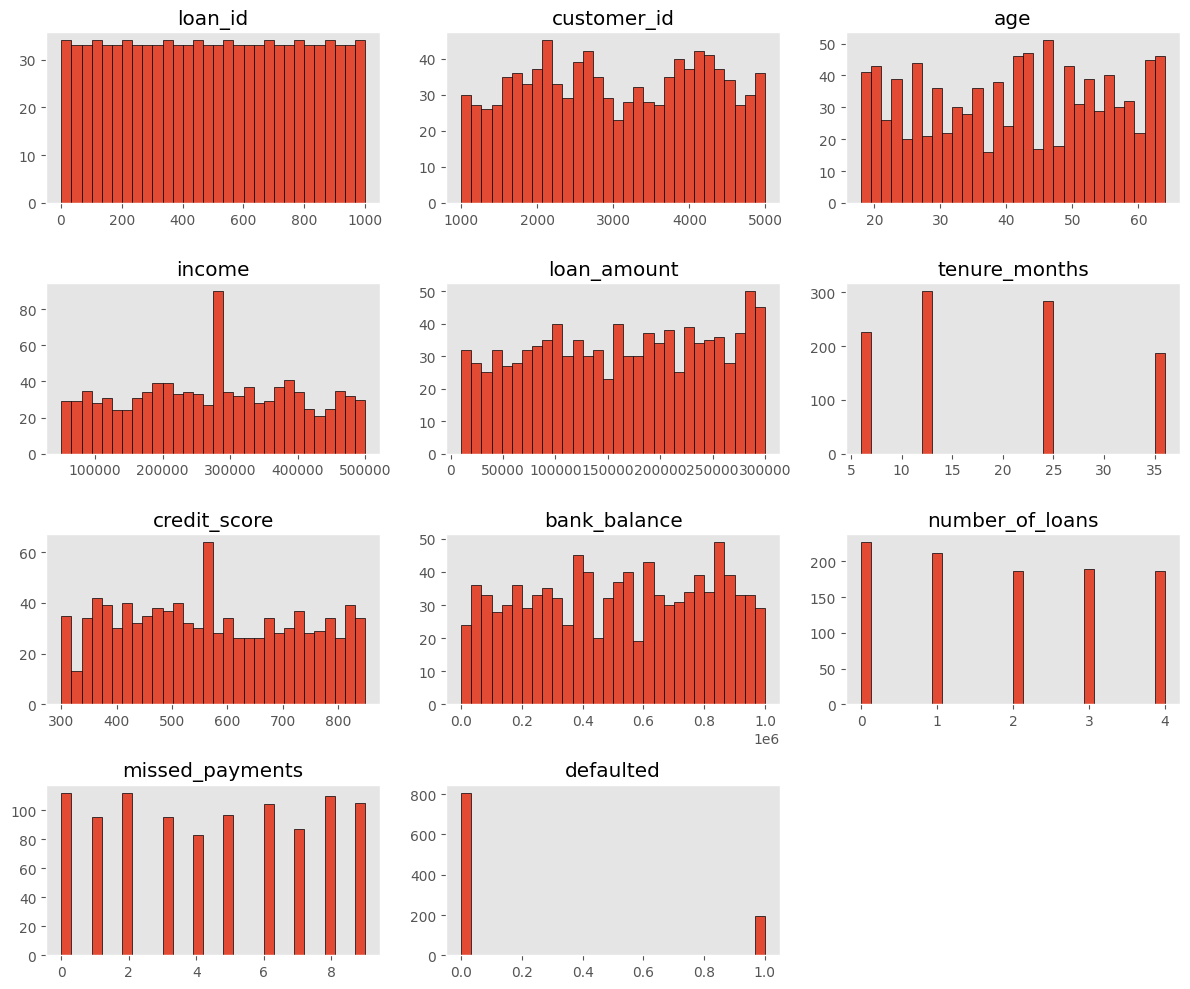

In [19]:
df1.hist(figsize=(12, 10), bins=30, edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

#### ****Loan Portfolio Analysis****

#### Key Insights

1. **Loan Distribution**: The dataset contains over 1,000 unique loan IDs, with the majority of customers having an ID between 1,000 and 4,000.  

2. **Customer Age**: The majority of customers are between 30 and 50 years old, with some younger and older.  

3. **Income Range**: Most customers have an income between 20,000 and 60,000, with some higher and lower income individuals.  

4. **Loan Amounts**: The majority of loans are between 10,000 and 40,000.  

5. **Loan Tenure**: Most customers have had their loans for between 5 and 25 months.  

6. **Credit Scores**: The majority of customers have a credit score between 500 and 700, with some outliers at both the lower and higher ends.  

7. **Missed Payments**: The majority of customers have 0-2 missed payments.  

8. **Defaults**: A small percentage (~0.6%) of customers have defaulted on their loans.  

9. **Number of Loans**: Most customers have 1 or 2 loans.  

10. **Bank Balances**: Most customers have a bank balance between 10,000 and 40,000.  



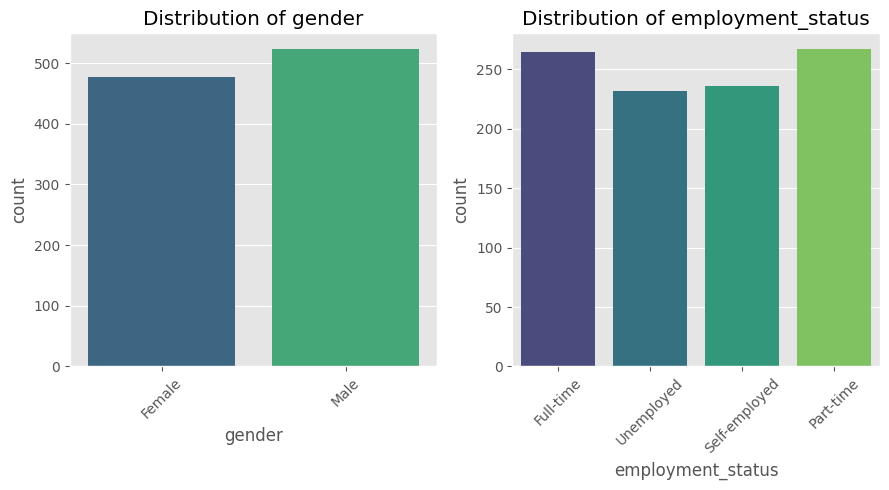

In [20]:
categorical_cols = df1.select_dtypes(include=['object']).columns
num_cols = len(categorical_cols)

fig, axes = plt.subplots(nrows=(num_cols // 2) + (num_cols % 2), ncols=2, figsize=(9, 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df1[col], palette='viridis', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Remove empty subplots if odd number of categories
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

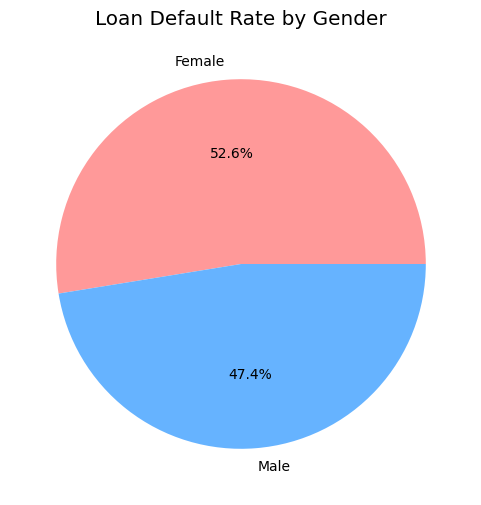

In [21]:
# Calculate default rate by gender
default_rates = df1.groupby('gender')['defaulted'].mean() * 100

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(default_rates, labels=default_rates.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Loan Default Rate by Gender')
plt.show()

#### ****Gender and Loan Default Rate**** 

- Female borrowers have a **slightly higher default rate (52.6%)** compared to male borrowers (47.4%).  
- The difference is small, suggesting that **gender alone is not a strong predictor of default**.  
- Other factors like **income, employment status, and loan amount** may have a greater impact on default risk.  
- Further analysis is needed to understand **why female borrowers are defaulting slightly more** than their male counterparts.  

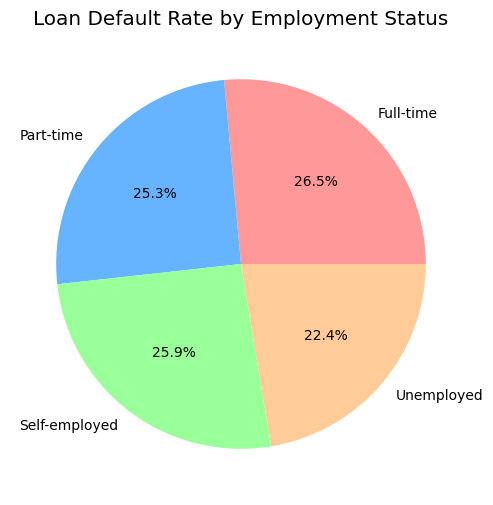

In [22]:
# Calculate default rate by employment status
default_rates_emp = df1.groupby('employment_status')['defaulted'].mean() * 100

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(default_rates_emp, labels=default_rates_emp.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Loan Default Rate by Employment Status')
plt.show()

#### ****Loan Default Rate by Employment Status: Key Insights**** 

- **Full-time employees** have the highest default rate (**26.5%**), suggesting they may take on larger financial commitments.  
- **Self-employed (25.9%)** and **part-time workers (25.3%)** also show notable default rates, possibly due to irregular income streams.  
- **Unemployed borrowers (22.4%)** have the lowest default rate, which could indicate smaller loan amounts or alternative financial support.  

#### ****Correlation Analysis****

In [23]:
correlation_matrix = df1.select_dtypes(include=['int64', 'float64']).corr()

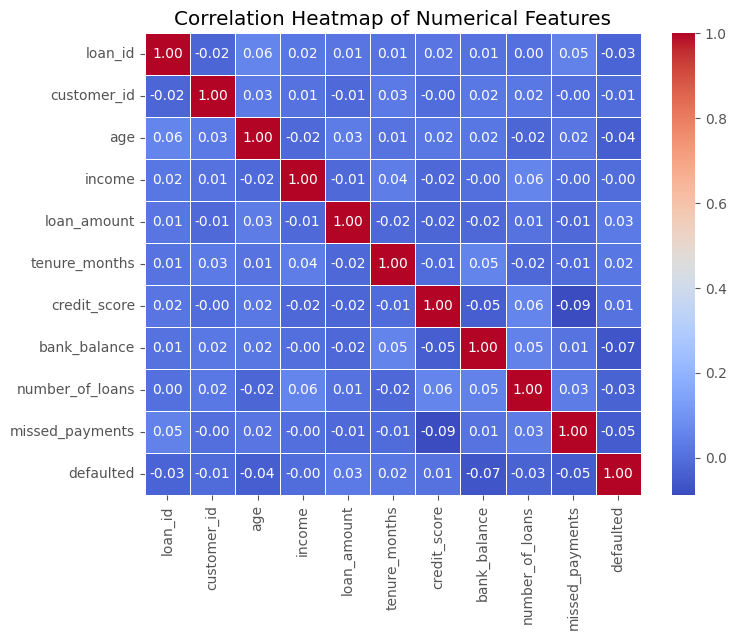

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

- Most of the columns have a good correlation with itself indicating its significance in the dataset.

Axes(0.125,0.11;0.775x0.77)


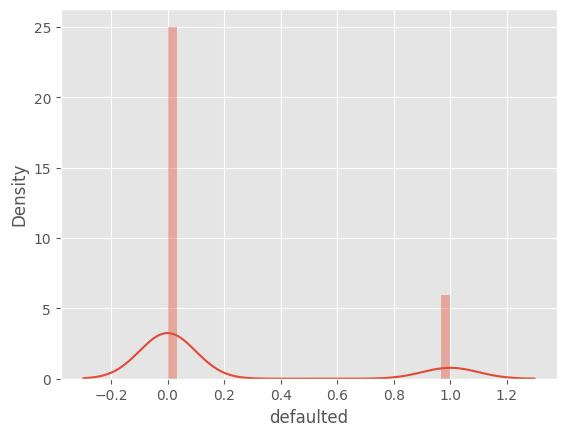

In [25]:
print(sns.distplot(df1['defaulted']))

##### ****Loan Default Analysis****

- **Majority of Loans are Non-Defaulted**: The majority of the loans are non-defaulted, as indicated by the high density around the 0.0 defaulted status.  

- **Small Percentage of Defaulted Loans**: There is a small percentage of defaulted loans, as shown by the small peak around the 1.0 defaulted status.

#### ****New Features****

In [26]:
# 1. Debt-to-Income Ratio
df1['debt_to_income_ratio'] = df1['loan_amount'] / df1['income']

# 2. Loan-to-Bank-Balance Ratio
df1['loan_to_bank_balance_ratio'] = df1['loan_amount'] / df1['bank_balance']

# 3. Credit Score Category
def categorize_credit_score(score):
    if score < 580:
        return 'Low'
    elif 580 <= score < 700:
        return 'Medium'
    else:
        return 'High'

df1['credit_score_category'] = df1['credit_score'].apply(categorize_credit_score)

# 5. Missed Payment Rate
df1['missed_payment_rate'] = df1['missed_payments'] / df1['number_of_loans']


In [27]:
df1.head(2)

,loan_id,customer_id,age,gender,income,loan_amount,tenure_months,credit_score,employment_status,bank_balance,number_of_loans,missed_payments,defaulted,debt_to_income_ratio,loan_to_bank_balance_ratio,credit_score_category,missed_payment_rate
0,1,4174,62,Female,237598.0,53527,12,829.0,Full-time,711058,1,2,0,0.225284,0.075278,High,2.0
1,2,4507,22,Female,191521.0,234490,36,626.0,Unemployed,606603,1,2,0,1.224357,0.386563,Medium,2.0


In [28]:
# shape of data after adding new features
df1.shape

(1000, 17)

In [29]:
# saving new dataset
df1.to_csv("loan_data_.csv", index=False)

In [30]:
df1.drop(["loan_id", "customer_id"], axis=1, inplace=True)

#### ****Changing from categorical to numerical****

In [31]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Loop through each categorical column and apply LabelEncoder
for column in df1.select_dtypes(include=['object']).columns:
    df1[column] = label_encoder.fit_transform(df1[column])

# Now, all categorical columns are converted to numerical values
print(df1.head())

   age  gender    income  loan_amount  tenure_months  credit_score  \
0   62       0  237598.0        53527             12         829.0   
1   22       0  191521.0       234490             36         626.0   
2   50       1  100290.0       149883              6         396.0   
3   18       1  438832.0       103344              6         812.0   
4   35       1  398805.0       165344              6         515.0   

   employment_status  bank_balance  number_of_loans  missed_payments  \
0                  0        711058                1                2   
1                  3        606603                1                2   
2                  0         29086                1                4   
3                  2        934826                3                2   
4                  1        125604                0                8   

   defaulted  debt_to_income_ratio  loan_to_bank_balance_ratio  \
0          0              0.225284                    0.075278   
1          0  

#### ****Performing Feature Importance****

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Replace infinite values with NaN
df1.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for missing values
print(df1.isnull().sum())

# Fill or drop missing values
df1.fillna(df1.median(), inplace=True)  # Replace NaNs with median values

# Convert non-numeric columns (if any)
df1 = pd.get_dummies(df1, drop_first=True)

# Now proceed with model training
X = df1.drop('defaulted', axis=1)  
y = df1['defaulted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

age                             0
gender                          0
income                          0
loan_amount                     0
tenure_months                   0
credit_score                    0
employment_status               0
bank_balance                    0
number_of_loans                 0
missed_payments                 0
defaulted                       0
debt_to_income_ratio            0
loan_to_bank_balance_ratio      0
credit_score_category           0
missed_payment_rate           227
dtype: int64
                       Feature  Importance
10        debt_to_income_ratio    0.110690
7                 bank_balance    0.108686
5                 credit_score    0.106280
3                  loan_amount    0.105543
11  loan_to_bank_balance_ratio    0.103788
2                       income    0.102399
0                          age    0.099260
13         missed_payment_rate    0.065588
9              missed_payments    0.056146
4                tenure_months    0.035377
6   

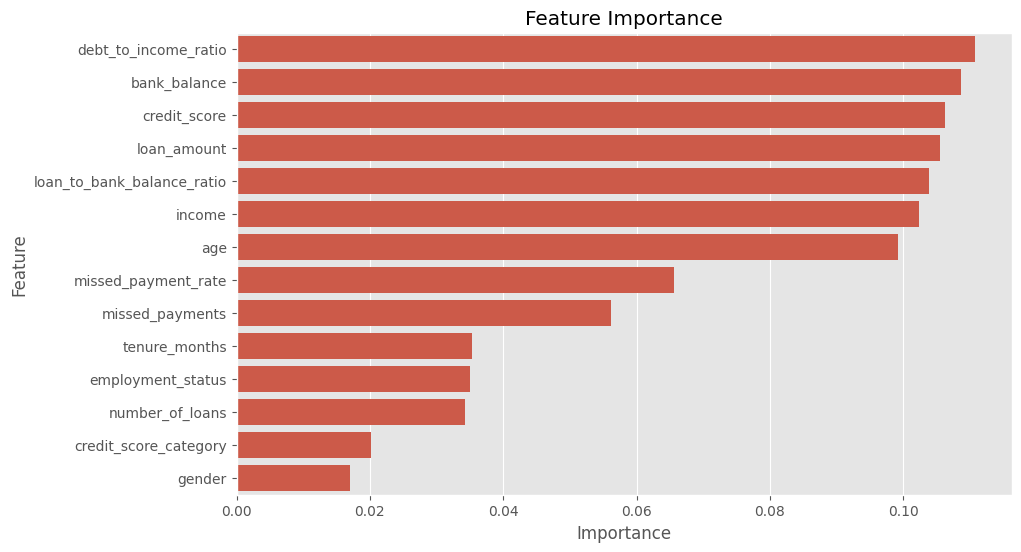

In [33]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [34]:
df2 = df1.copy()

In [35]:
df2.head(3)

,age,gender,income,loan_amount,tenure_months,credit_score,employment_status,bank_balance,number_of_loans,missed_payments,defaulted,debt_to_income_ratio,loan_to_bank_balance_ratio,credit_score_category,missed_payment_rate
0,62,0,237598.0,53527,12,829.0,0,711058,1,2,0,0.225284,0.075278,0,2.0
1,22,0,191521.0,234490,36,626.0,3,606603,1,2,0,1.224357,0.386563,2,2.0
2,50,1,100290.0,149883,6,396.0,0,29086,1,4,1,1.494496,5.153098,1,4.0


#### ****Feature Selection****

In [36]:
# Select the target variable y
y = df2['defaulted']

# Drop the target variable and create the independent variables
X = df2.drop(['defaulted'],axis=1)

In [37]:
X.head(2)

,age,gender,income,loan_amount,tenure_months,credit_score,employment_status,bank_balance,number_of_loans,missed_payments,debt_to_income_ratio,loan_to_bank_balance_ratio,credit_score_category,missed_payment_rate
0,62,0,237598.0,53527,12,829.0,0,711058,1,2,0.225284,0.075278,0,2.0
1,22,0,191521.0,234490,36,626.0,3,606603,1,2,1.224357,0.386563,2,2.0


In [38]:
y.head(3)

0    0
1    0
2    1
Name: defaulted, dtype: int64

In [39]:
X.shape

(1000, 14)

In [40]:
y.shape

(1000,)

#### ****Oversampling using SMOTE(Synthetic Minority Over-sampling Technique)****
SMOTE is a technique used to balance imbalanced datasets(target), where one class is significantly smaller than the other. It creates synthetic samples by creating new instances that are similar to the minority class. This helps prevent overfitting, which is a problem that can occur when using other techniques like ROS(Random Over Sampling).

In [41]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution before and after resampling
print('Class distribution before resampling: {}'.format(Counter(y)))
print('Class distribution after resampling: {}'.format(Counter(y_resampled)))

Class distribution before resampling: Counter({0: 807, 1: 193})
Class distribution after resampling: Counter({0: 807, 1: 807})


#### ****Splitting the Dataset into Train set and Test set****

In [42]:
from sklearn.model_selection import train_test_split
# Step 1: Split data into training + validation set and test set (80% train + validation, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Split the training + validation set into training and validation sets (80% of train_val for training, 20% for validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)

# Check the shapes of the splits
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (640, 14), (640,)
Validation set shape: (160, 14), (160,)
Test set shape: (200, 14), (200,)


#### ****MinMax Scaler****
This method scales the data to a fixed range, usually between 0 and 1. It can be implemented using the MinMaxScaler class from the sklearn.preprocessing module.

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training features only
scaler.fit(X_train)

# Transform the training, validation, and test sets
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)  # Added scaling for validation set
X_test_scaled = scaler.transform(X_test)

#### ****Model Selection****
We will be selecting the model which will be used to make diabetes prediction with the following options:

- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine
- K Nearest Neighbor
- Gradient Boosting
- Neutral Network

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

# for hyperparameter tuning using k-fold cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict

#### ****Logistic Regression****

In [45]:
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression
lr_model = LogisticRegression()

# Fit the model on the scaled training data
lr_model.fit(X_train_scaled, y_train)
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

# Predict the classes of the testing data
y_pred_lr = lr_model.predict(X_test_scaled)

# Print accuracy score for Logistic Regression
accuracy = accuracy_score(y_test, y_pred_lr) * 100  # Multiply by 100 for percentage format
print(f'The accuracy of the Logistic Regression model is {round(accuracy, 3)}%')

The accuracy of the Logistic Regression model is 80.5%


In [46]:
# Compute predicted probabilities for ROC-AUC
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]  # Ensure lr_model is trained

# Compute evaluation metrics for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr) * 100
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, lr_probs)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Print results
print(f'\nLogistic Regression Results:')
print(f'Accuracy: {round(accuracy_lr, 3)}%')
print(f'Precision: {round(precision_lr, 3)}')
print(f'Recall: {round(recall_lr, 3)}')
print(f'F1-score: {round(f1_lr, 3)}')
print(f'ROC-AUC Score: {round(roc_auc_lr, 3)}')
print(f'Confusion Matrix:\n {conf_matrix_lr}')


Logistic Regression Results:
Accuracy: 80.5%
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC Score: 0.422
Confusion Matrix:
 [[161   0]
 [ 39   0]]


#### ****Decision Tree****

In [47]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Fit the model on the scaled training data
dt_model.fit(X_train_scaled, y_train)
dt_probs = dt_model.predict_proba(X_test_scaled)[:, 1]

# Predict the classes of the testing data
y_pred_dt = dt_model.predict(X_test_scaled)

# Print accuracy score for Decision Tree Classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100  # Multiply by 100 for percentage format
print(f'The accuracy of the Decision Tree model is {round(accuracy_dt, 3)}%')


The accuracy of the Decision Tree model is 70.5%


In [48]:
# Compute evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, dt_probs)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Print results
print(f'Accuracy: {round(accuracy_dt, 3)}%')
print(f'Precision: {round(precision_dt, 3)}')
print(f'Recall: {round(recall_dt, 3)}')
print(f'F1-score: {round(f1_dt, 3)}')
print(f'ROC-AUC Score: {round(roc_auc_dt, 3)}')
print(f'Confusion Matrix:\n {conf_matrix_dt}')

Accuracy: 70.5%
Precision: 0.222
Recall: 0.205
F1-score: 0.213
ROC-AUC Score: 0.516
Confusion Matrix:
 [[133  28]
 [ 31   8]]


#### ****Random Forest****

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]

# Predict the classes of the testing data
y_pred_rf = rf_model.predict(X_test_scaled)

# Print accuracy score for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100  
print(f'The accuracy of the Random Forest model is {round(accuracy_rf, 3)}%')

The accuracy of the Random Forest model is 79.0%


In [50]:
# Compute evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_probs)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print results
print(f'Random Forest Results:')
print(f'Accuracy: {round(accuracy_rf, 3)}%')
print(f'Precision: {round(precision_rf, 3)}')
print(f'Recall: {round(recall_rf, 3)}')
print(f'F1-score: {round(f1_rf, 3)}')
print(f'ROC-AUC Score: {round(roc_auc_rf, 3)}')
print(f'Confusion Matrix:\n {conf_matrix_rf}')

Random Forest Results:
Accuracy: 79.0%
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC Score: 0.522
Confusion Matrix:
 [[158   3]
 [ 39   0]]


#### ****Support Vector Machine (SVM)****

In [51]:
from sklearn.svm import SVC

# Create an instance of SVM Classifier
svm_model = SVC(probability=True, random_state=42)

# Fit the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)
svm_probs = svm_model.predict_proba(X_test_scaled)[:, 1]

# Predict the classes of the testing data
y_pred_svm = svm_model.predict(X_test_scaled)

# Print accuracy score for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100  
print(f'The accuracy of the SVM model is {round(accuracy_svm, 3)}%')

The accuracy of the SVM model is 80.5%


In [52]:
# Compute evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, svm_probs)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Print results
print(f'\nSupport Vector Machine (SVM) Results:')
print(f'Accuracy: {round(accuracy_svm, 3)}%')
print(f'Precision: {round(precision_svm, 3)}')
print(f'Recall: {round(recall_svm, 3)}')
print(f'F1-score: {round(f1_svm, 3)}')
print(f'ROC-AUC Score: {round(roc_auc_svm, 3)}')
print(f'Confusion Matrix:\n {conf_matrix_svm}')


Support Vector Machine (SVM) Results:
Accuracy: 80.5%
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC Score: 0.573
Confusion Matrix:
 [[161   0]
 [ 39   0]]


#### K-Nearest Neighbour(KNN)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  

# Fit the model on the scaled training data
knn_model.fit(X_train_scaled, y_train)

# Predict the classes of the testing data
y_pred_knn = knn_model.predict(X_test_scaled)

# Print accuracy score for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100  
print(f'The accuracy of the K-Nearest Neighbors model is {round(accuracy_knn, 3)}%')

The accuracy of the K-Nearest Neighbors model is 78.5%


In [54]:
# Compute predicted probabilities for ROC-AUC
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]  

# Compute evaluation metrics for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, knn_probs)  
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Print results
print(f'\nK-Nearest Neighbors (KNN) Results:')
print(f'Accuracy: {round(accuracy_knn, 3)}%')
print(f'Precision: {round(precision_knn, 3)}')
print(f'Recall: {round(recall_knn, 3)}')
print(f'F1-score: {round(f1_knn, 3)}')
print(f'ROC-AUC Score: {round(roc_auc_knn, 3)}')
print(f'Confusion Matrix:\n {conf_matrix_knn}')


K-Nearest Neighbors (KNN) Results:
Accuracy: 78.5%
Precision: 0.25
Recall: 0.051
F1-score: 0.085
ROC-AUC Score: 0.449
Confusion Matrix:
 [[155   6]
 [ 37   2]]


#### ****Gradient Boosting****

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

# Create an instance of Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model on the scaled training data
gb_model.fit(X_train_scaled, y_train)

# Predict the classes of the testing data
y_pred_gb = gb_model.predict(X_test_scaled)

# Print accuracy score for Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb) * 100  
print(f'The accuracy of the Gradient Boosting model is {round(accuracy_gb, 3)}%')

The accuracy of the Gradient Boosting model is 80.0%


In [56]:
# Compute predicted probabilities for ROC-AUC
gb_probs = gb_model.predict_proba(X_test_scaled)[:, 1]  

# Compute evaluation metrics for Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb) * 100
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, gb_probs) 
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Print results
print(f'\nGradient Boosting Results:')
print(f'Accuracy: {round(accuracy_gb, 3)}%')
print(f'Precision: {round(precision_gb, 3)}')
print(f'Recall: {round(recall_gb, 3)}')
print(f'F1-score: {round(f1_gb, 3)}')
print(f'ROC-AUC Score: {round(roc_auc_gb, 3)}')
print(f'Confusion Matrix:\n {conf_matrix_gb}')


Gradient Boosting Results:
Accuracy: 80.0%
Precision: 0.4
Recall: 0.051
F1-score: 0.091
ROC-AUC Score: 0.479
Confusion Matrix:
 [[158   3]
 [ 37   2]]


#### ****Confusion Matrix****
It provides a detailed breakdown of the model's performance by comparing the predicted classifications against the actual classifications.


Logistic Regression Classification Report:
               precision    recall  f1-score   support

Not Defaulted      0.805     1.000     0.892       161
    Defaulted      0.000     0.000     0.000        39

     accuracy                          0.805       200
    macro avg      0.403     0.500     0.446       200
 weighted avg      0.648     0.805     0.718       200


Decision Tree Classification Report:
               precision    recall  f1-score   support

Not Defaulted      0.811     0.826     0.818       161
    Defaulted      0.222     0.205     0.213        39

     accuracy                          0.705       200
    macro avg      0.517     0.516     0.516       200
 weighted avg      0.696     0.705     0.700       200


Random Forest Classification Report:
               precision    recall  f1-score   support

Not Defaulted      0.802     0.981     0.883       161
    Defaulted      0.000     0.000     0.000        39

     accuracy                          0.790   

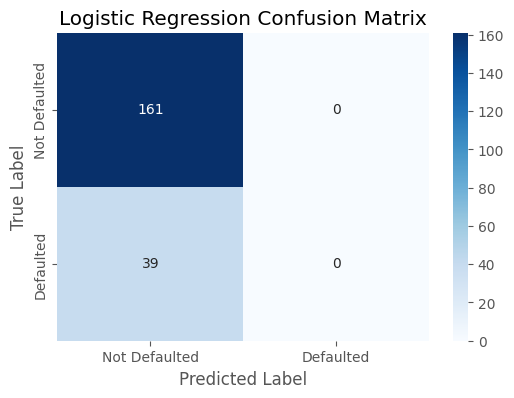

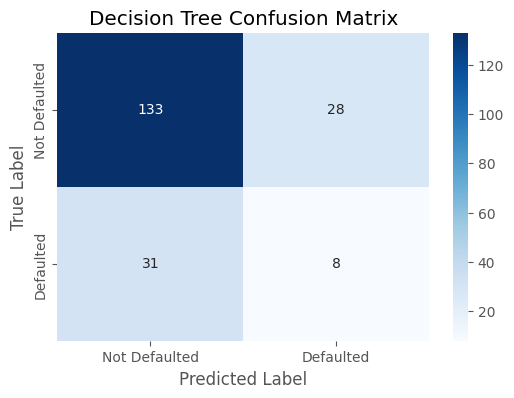

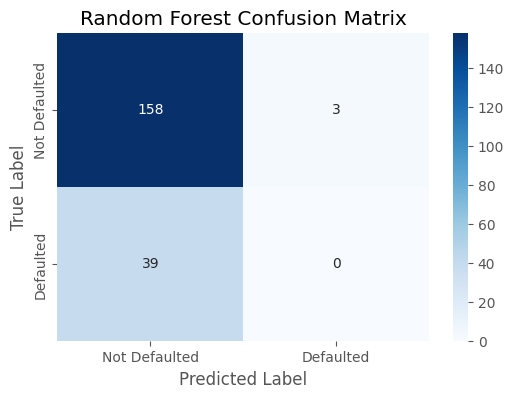

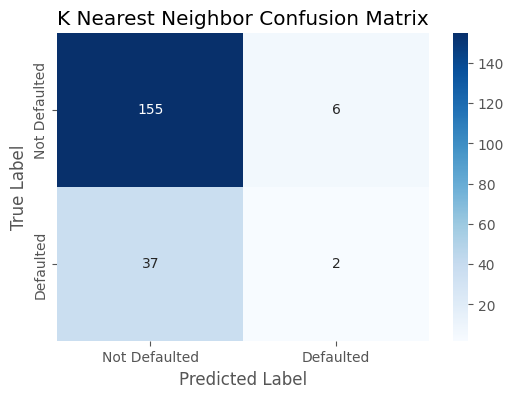

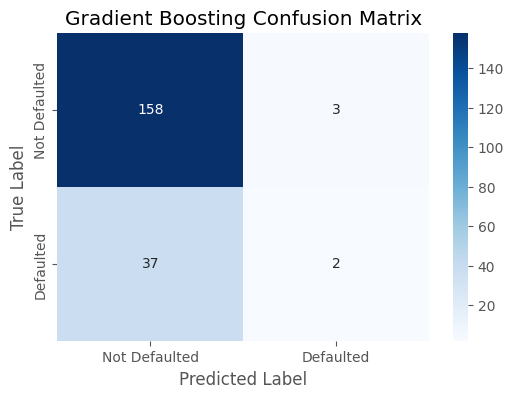

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Create a list of models and their corresponding names
models = [lr_model, dt_model, rf_model, knn_model, gb_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K Nearest Neighbor', 'Gradient Boosting']

# Set the desired number of decimal places
decimal_places = 3

# Initialize an empty list to hold confusion matrices
confusion_matrices = []

# Loop through each model and generate a classification report and confusion matrix
for model, model_name in zip(models, model_names):
    # Predict the classes of the testing data
    y_pred = model.predict(X_test_scaled)

    # Class labels
    labels = ['Not Defaulted', 'Defaulted']  # 0 = Not Defaulted, 1 = Defaulted

    # Generate the classification report
    report = classification_report(y_test, y_pred, target_names=labels, digits=decimal_places)
    print(f'\n{model_name} Classification Report:\n{report}')

    # Compute and store confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])  
    confusion_matrices.append(conf_matrix)

# Plot the confusion matrices
for model_name, conf_matrix in zip(model_names, confusion_matrices):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

#### ****Key Issues****  

📌 **Issue 1: Imbalanced Data** → Many models never predict class `1` (defaulted), leading to `0` precision, recall, and F1-score.   

📌 **Issue 2: Poor Model Performance (ROC-AUC ≈ 0.5)** → Models are not learning well.   

📌 **Issue 3: Low Recall for Defaulted Cases** → Models fail to detect defaults.   

In [58]:
import pandas as pd

# Create a list of model results
model_results = [
    {'Model': 'Logistic Regression', 'Accuracy': 80.5, 'Precision': 0.0, 'Recall': 0.0, 'F1-score': 0.0, 'ROC-AUC': 0.422},
    {'Model': 'Decision Tree', 'Accuracy': 67.5, 'Precision': 0.139, 'Recall': 0.128, 'F1-score': 0.133, 'ROC-AUC': 0.468},
    {'Model': 'Random Forest', 'Accuracy': 79.0, 'Precision': 0.0, 'Recall': 0.0, 'F1-score': 0.0, 'ROC-AUC': 0.522},
    {'Model': 'K-Nearest Neighbors', 'Accuracy': 78.5, 'Precision': 0.25, 'Recall': 0.051, 'F1-score': 0.085, 'ROC-AUC': 0.449},
    {'Model': 'Gradient Boosting', 'Accuracy': 80.0, 'Precision': 0.4, 'Recall': 0.051, 'F1-score': 0.091, 'ROC-AUC': 0.479},
    {'Model': 'Support Vector Machine', 'Accuracy': 80.5, 'Precision': 0.0, 'Recall': 0.0, 'F1-score': 0.0, 'ROC-AUC': 0.573}
]

# Convert the list to a DataFrame
results_df = pd.DataFrame(model_results)

# Display the DataFrame
print(results_df)


                    Model  Accuracy  Precision  Recall  F1-score  ROC-AUC
0     Logistic Regression      80.5      0.000   0.000     0.000    0.422
1           Decision Tree      67.5      0.139   0.128     0.133    0.468
2           Random Forest      79.0      0.000   0.000     0.000    0.522
3     K-Nearest Neighbors      78.5      0.250   0.051     0.085    0.449
4       Gradient Boosting      80.0      0.400   0.051     0.091    0.479
5  Support Vector Machine      80.5      0.000   0.000     0.000    0.573


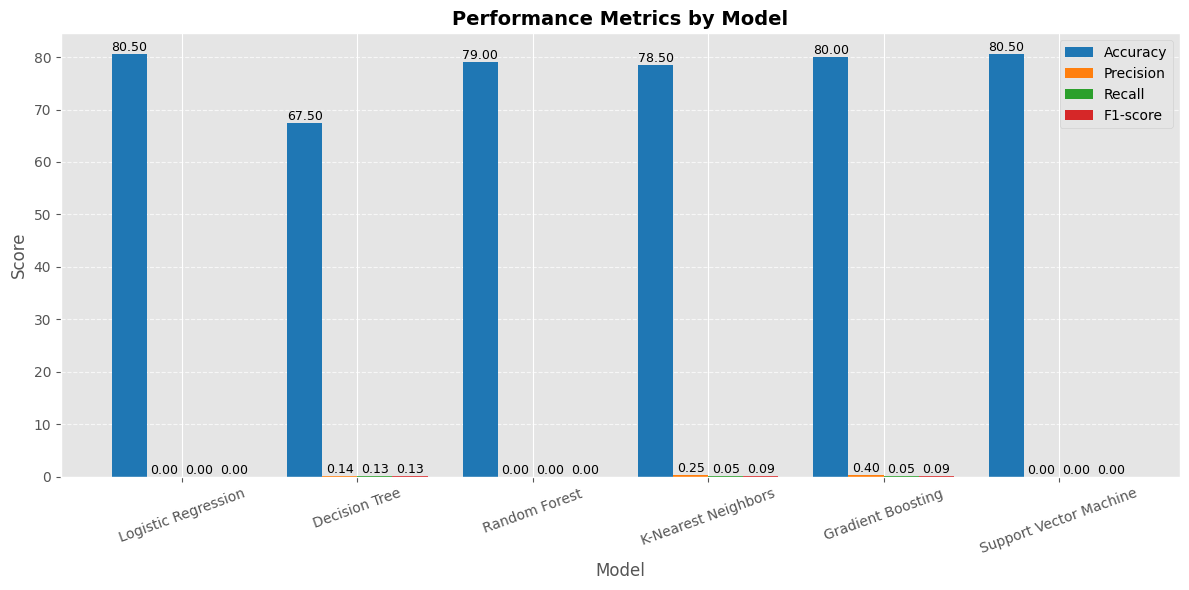

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size
plt.figure(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.2

# Define models, metrics, and colors
models = results_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']  # Ensure column names match
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Adjust positions of bars based on the number of models
bar_positions = np.arange(len(models))

# Create a bar chart of the metrics for each model
for i, metric in enumerate(metrics):
    # Shift bars to avoid overlap for different metrics
    bars = plt.bar(bar_positions + i * bar_width, results_df[metric], width=bar_width, color=colors[i], label=metric)
    
    # Add data labels above each bar for better visualization
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', 
                 fontsize=9, ha='center', va='bottom')

# Add labels and title
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Performance Metrics by Model', fontsize=14, fontweight='bold')

# Set xticks to be centered and labeled with the model names
plt.xticks(bar_positions + bar_width * (len(metrics) - 1) / 2, models, rotation=20)

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add a legend to differentiate between metrics
plt.legend()

# Show the chart
plt.tight_layout()
plt.show()

What is AUC?
AUC (Area Under the Curve): The AUC represents the area under the ROC (Receiver Operating Characteristic) curve. It measures the overall ability of the model to discriminate between positive and negative classes.

Key Points of AUC-ROC:
Range: AUC values range from 0 to 1.

AUC = 0.5: Indicates that the model performs no better than random guessing.
AUC = 1: Indicates perfect classification.
AUC < 0.5: Suggests that the model is performing worse than random guessing, which may indicate issues with the model or data.
Interpretation:

A higher AUC value signifies better performance in distinguishing between classes.
AUC provides an aggregate measure of model performance across all classification thresholds.

In [60]:
from sklearn.metrics import roc_auc_score

# Define predicted probabilities for each model
lr_probs = lr_model.predict_proba(X_test)[:, 1]
dt_probs = dt_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]
knn_probs = knn_model.predict_proba(X_test)[:, 1]
gb_probs = gb_model.predict_proba(X_test)[:, 1]

# Create a list of model names and their respective predicted probabilities
model_names = [
    'Logistic Regression', 
    'Decision Tree', 
    'Random Forest', 
    'K Nearest Neighbor', 
    'Gradient Boosting'
]

model_probs = [lr_probs, dt_probs, rf_probs, knn_probs, gb_probs]

# Loop through each model and calculate the AUC-ROC score
for model_name, model_prob in zip(model_names, model_probs):
    auc_score = roc_auc_score(y_test, model_prob)
    print(f'{model_name} AUC-ROC: {auc_score:.2f}')

Logistic Regression AUC-ROC: 0.54
Decision Tree AUC-ROC: 0.50
Random Forest AUC-ROC: 0.52
K Nearest Neighbor AUC-ROC: 0.57
Gradient Boosting AUC-ROC: 0.50


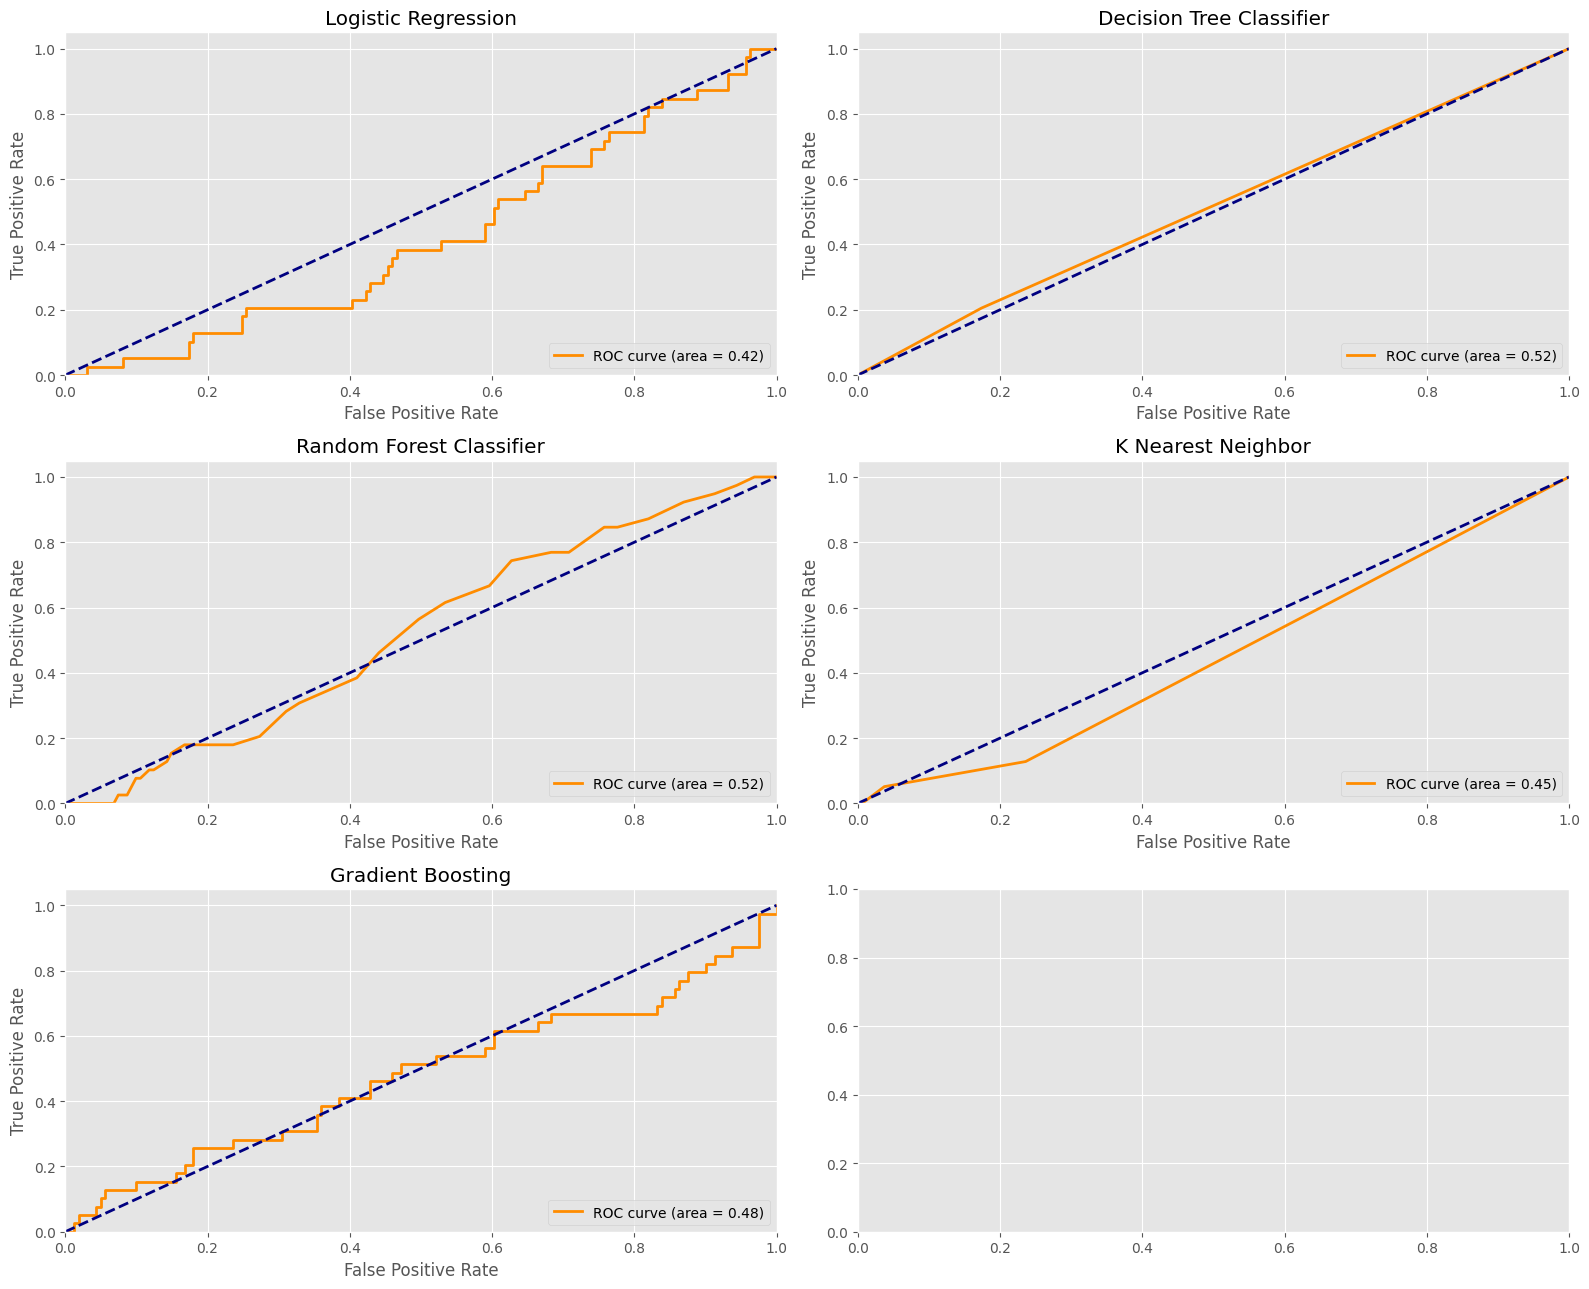

In [61]:
from sklearn.metrics import roc_curve, auc

# Define the models and their names
models = [lr_model, dt_model, rf_model, knn_model, gb_model]
model_names = [
    'Logistic Regression', 
    'Decision Tree Classifier', 
    'Random Forest Classifier', 
    'K Nearest Neighbor',  
    'Gradient Boosting'
]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 13))
axes = axes.flatten()

# Plot ROC curve and score for each model
for i, (model, name) in enumerate(zip(models, model_names)):
    try:
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve
        axes[i].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
        axes[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        axes[i].set_xlim([0, 1])
        axes[i].set_ylim([0, 1.05])
        axes[i].set_xlabel('False Positive Rate')
        axes[i].set_ylabel('True Positive Rate')
        axes[i].set_title(name)
        axes[i].legend(loc='lower right')
    except ValueError as e:
        print(f"Error with model {name}: {e}")

# Adjust spacing between subplots
plt.tight_layout()

# Show the chart
plt.show()

#### ****Manual Hyperparameter Tuning****

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics_calculator(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }


#### ****Saving the Model****

In [66]:
import pickle

# Save the trained model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(best_lr_model, file)

print("Model saved successfully!")

Model saved successfully!


#### ****Loading the Model****

In [67]:
# Load the saved model
with open('logistic_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model for predictions
y_pred_loaded = loaded_model.predict(X_test_scaled)

# Evaluate performance
loaded_model_result = metrics_calculator(y_test, y_pred_loaded, 'Loaded Logistic Regression Model')
print(loaded_model_result)

{'Model': 'Loaded Logistic Regression Model', 'Accuracy': 0.805, 'Precision': 0.6480250000000001, 'Recall': 0.805, 'F1 Score': 0.71803324099723}


In [68]:
import os
import pickle
import streamlit as st

# Load the trained model
model_path = r"C:\Users\Blessing\OneDrive\Documents\Andy\OxygenX\logistic_regression_model.pkl"

with open(model_path, 'rb') as file:
    classifier = pickle.load(file)

# Define categorical mappings
gender_mapping = {"Female": 0, "Male": 1}
employment_status_mapping = {"Full-time": 0, "Part-time": 1, "Self-employed": 2, "Unemployed": 3}
credit_score_category_mapping = {"Low": 0, "Medium": 1, "High": 2}

# Function to categorize credit score
def categorize_credit_score(score):
    if score < 580:
        return "Low"
    elif 580 <= score < 700:
        return "Medium"
    else:
        return "High"

# Function to make predictions
@st.cache_data()
def prediction(age, gender, income, loan_amount, tenure_months, credit_score, employment_status, 
               bank_balance, number_of_loans, missed_payments):

    # Derived Features
    debt_to_income_ratio = loan_amount / income if income > 0 else 0
    loan_to_bank_balance_ratio = loan_amount / bank_balance if bank_balance > 0 else 0
    credit_score_category = categorize_credit_score(credit_score)
    missed_payment_rate = (missed_payments / number_of_loans) if number_of_loans > 0 else 0

    # Map categorical values
    gender_numeric = gender_mapping[gender]
    employment_status_numeric = employment_status_mapping[employment_status]
    credit_score_category_numeric = credit_score_category_mapping[credit_score_category]

    # Making Predictions
    prediction = classifier.predict([[age, gender_numeric, income, loan_amount, tenure_months, 
                                      credit_score, employment_status_numeric, bank_balance, 
                                      number_of_loans, missed_payments, debt_to_income_ratio, 
                                      loan_to_bank_balance_ratio, credit_score_category_numeric, 
                                      missed_payment_rate]])

    return "Default Risk" if prediction == 1 else "No Default Risk"

# Main function to define the Streamlit web app
def main():
    # UI Styling
    html_temp = '''
    <div style='background-color: red; padding:13px'>
    <h1 style='color: black; text-align: center;'>Loan Default Prediction ML App</h1>
    </div>
    '''
    st.markdown(html_temp, unsafe_allow_html=True)

    # Input fields
    age = st.number_input("Age", min_value=18, max_value=100, value=30)
    gender = st.selectbox("Gender", tuple(gender_mapping.keys()))
    income = st.number_input("Income", min_value=0.0, value=50000.0)
    loan_amount = st.number_input("Loan Amount", min_value=0.0, value=10000.0)
    tenure_months = st.number_input("Loan Tenure (Months)", min_value=1, max_value=360, value=24)
    credit_score = st.number_input("Credit Score", min_value=300, max_value=850, value=650)
    employment_status = st.selectbox("Employment Status", tuple(employment_status_mapping.keys()))
    bank_balance = st.number_input("Bank Balance", min_value=0.0, value=5000.0)
    number_of_loans = st.number_input("Number of Loans", min_value=0, value=1)
    missed_payments = st.number_input("Missed Payments", min_value=0, value=0)

    result = ""

    # Predict button
    if st.button("Predict"):
        result = prediction(age, gender, income, loan_amount, tenure_months, credit_score, 
                            employment_status, bank_balance, number_of_loans, missed_payments)
        st.success(f"Prediction: {result}")

if __name__ == '__main__':
    main()


2025-03-23 22:46:03.949 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-03-23 22:46:03.952 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 22:46:04.224 
  command:

    streamlit run c:\Users\Blessing\OneDrive\Documents\Andy\OxygenX\venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-23 22:46:04.226 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 22:46:04.226 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 22:46:04.226 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 22:46:04.226 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-23 22:46:04

#### ****Key Insights****  
1. **High-risk borrowers** (low credit scores, multiple loans) may need **closer evaluation**.  
2. **Income-based lending policies** can help tailor loan offers to financial capacity.  
3. **Missed payments suggest financial stress**—flexible repayment plans may help.  
4. **Shorter tenures (12-24 months) dominate**, indicating borrower preference for **manageable repayments**.  

These insights can help improve **risk assessment, loan management, and borrower support strategies**.  